In [1]:
#%matplotlib notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "CIMG1710.JPG"
K = 6
loss_diff_goal = 0.01

In [3]:
img = cv2.imread(path).astype(int)
img_size = img.shape
img = img.reshape([-1, 3])

In [4]:
means = img[np.random.randint(0, img.shape[0], [K])]
distances = np.zeros([K, img.shape[0]])

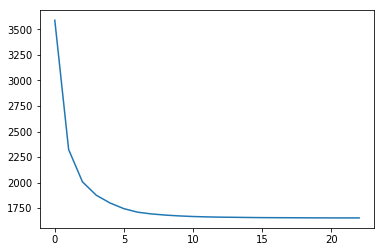

In [5]:
loss = []
while len(loss) < 2 or abs(loss[-2] - loss[-1]) > loss_diff_goal:
    for k in range(K):
        distances[k] = np.sum((img - means[k]) ** 2, axis=-1)
    cluster = np.argmin(distances, axis=0)
    
    loss.append(np.mean(np.min(distances, axis=0)))

    for k in range(K):
        means[k] = np.sum(img[cluster == k], axis=0) / np.sum(cluster == k)

fig = plt.figure()
ax = plt.axes()
ax.plot(np.arange(len(loss)), loss)

In [6]:
for k in range(K):
    distances[k] = np.sum((img - means[k]) ** 2, axis=-1)
cluster = np.argmin(distances, axis=0)

for k in range(K):
    img[cluster == k] = means[k]
img = img.reshape(img_size)

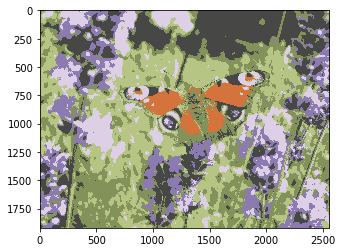

In [7]:
plt.imshow(np.flip(img.astype(np.uint8), axis=-1))   